## Preprocessing train dataset

Divide the *train* folder into two folders *mytrain* and *myvalid*

- Gtrain ---- including two folders 
    - CatTrain ---- including about 11250 cat images 
    - DogTrain ---- including about 11250 dog images 

- Gvalid ---- including two folders 
    - CatValid ---- including about 1250 cat images
    - DogValid ---- including about 1250 dog images

In [1]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import subprocess
import shutil
%matplotlib inline

## Visualize the size of the original *train* dataset.

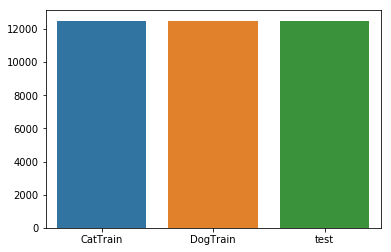

In [2]:
train_filenames = os.listdir('train')
CatTrain = filter(lambda x:x[:3] == 'cat', train_filenames)
DogTrain = filter(lambda x:x[:3] == 'dog', train_filenames)
lcat = [x for x in train_filenames if x[:3] == 'cat']
ldog = [x for x in train_filenames if x[:3] == 'dog']
x = ['CatTrain', 'DogTrain', 'test']
y = [len(lcat), len(ldog), len(os.listdir('test'))]
ax = sns.barplot(x=x, y=y)

## Shuffle and split the train filenames

In [3]:
Gtrain, Gvalid = train_test_split(train_filenames, test_size=0.1)
print (len(Gtrain))
print (len(Gvalid))

22500
2500


## Visualize the size of the processed train dataset

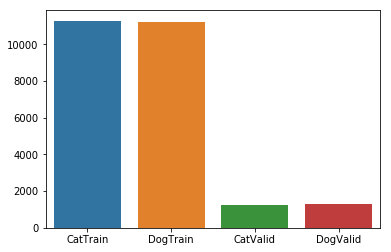

In [4]:
CatTrain = filter(lambda x:x[:3] == 'cat', Gtrain)
DogTrain = filter(lambda x:x[:3] == 'dog', Gtrain)
CatValid = filter(lambda x:x[:3] == 'cat', Gvalid)
DogValid = filter(lambda x:x[:3] == 'dog', Gvalid)

TCat = [x for x in Gtrain if x[:3] == 'cat']
TDog = [x for x in Gtrain if x[:3] == 'dog']
VCat = [x for x in Gvalid if x[:3] == 'cat']
VDog = [x for x in Gvalid if x[:3] == 'dog']

x = ['CatTrain', 'DogTrain', 'CatValid', 'DogValid']
y = [len(TCat), len(TDog), len(VCat), len(VDog)]

ax = sns.barplot(x=x, y=y)

## Create symbolic link of images

In [5]:
def delete_and_create_class(dirname):
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)
    os.mkdir(dirname+'/cat')
    os.mkdir(dirname+'/dog')

delete_and_create_class('Gtrain')
delete_and_create_class('Gvalid')


os.system('fsutil behavior set SymlinkEvaluation L2L:1 L2R:0')
    
for filename in CatTrain:
    subprocess.check_call('mklink "%s" "%s"' % ('D:/BaiduYunDownload/Machine Learning/Final Project/CD/Gtrain/cat/'.replace('/', '\\')+filename,\
                                                'D:/BaiduYunDownload/Machine Learning/Final Project/CD/train/'.replace('/', '\\')+filename), shell=True)

for filename in DogTrain:
    subprocess.check_call('mklink "%s" "%s"' % ('D:/BaiduYunDownload/Machine Learning/Final Project/CD/Gtrain/dog/'.replace('/', '\\')+filename,\
                                                'D:/BaiduYunDownload/Machine Learning/Final Project/CD/train/'.replace('/', '\\')+filename), shell=True)


for filename in CatValid:
    subprocess.check_call('mklink "%s" "%s"' % ('D:/BaiduYunDownload/Machine Learning/Final Project/CD/Gvalid/cat/'.replace('/', '\\')+filename,\
                                                'D:/BaiduYunDownload/Machine Learning/Final Project/CD/train/'.replace('/', '\\')+filename), shell=True)

    
for filename in DogValid:
    subprocess.check_call('mklink "%s" "%s"' % ('D:/BaiduYunDownload/Machine Learning/Final Project/CD/Gvalid/dog/'.replace('/', '\\')+filename,\
                                                'D:/BaiduYunDownload/Machine Learning/Final Project/CD/train/'.replace('/', '\\')+filename), shell=True)

